In [649]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import linear_model
from sklearn.linear_model import LinearRegression




import sklearn.metrics as metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [650]:
# reading the dataset
house_price = pd.read_csv("C:/Users/slnu009/Downloads/train (1).csv")

In [651]:
house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [652]:
house_price.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [653]:
house_price['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

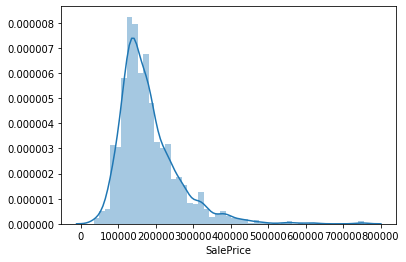

In [654]:
# has a right skewed distribution, this needs to be transformed normally
sns.distplot(house_price['SalePrice'])
plt.show()

In [655]:
# We use log transformation to transform the Sale Price to Normal Distribution
house_price['SalePriceTransformed'] = np.log(house_price['SalePrice'])

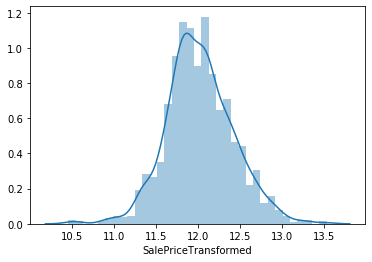

In [656]:
sns.distplot(house_price['SalePriceTransformed'])
plt.show()

In [657]:
house_price.loc[house_price.duplicated()] #No Duplcate entries

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice, SalePriceTransformed]
Index: []

[0 rows x 82 columns]

In [658]:
house_price.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000     0.000000   
max     547.000000     552.000000   508.000000   480.000000   738.000000   

            MiscVal       MoSold       YrSold      SalePrice  \
count   1460.000000  1460.000000  1460.000000    1460.000000   
mean      43.489041     6.321918  2007.815753  180921.195890   
std      496.123024     2.703626     1.328095   79442.502883   
min        0.000000     1.000000  2006.000000   34900.000000   
25%        0.000000     5.000000  2007.000000  129975.000000   
50%        0.000000     6.000000  2008.000000  163000.000000   
75%        0.000000     8.000000  2009.000000  214000.000000   
max    15500.000000    12.000000  2010.000000  755000.000000   

       SalePriceTransformed  
count           1460.000000  
mean              12.024051  
std                0.399452  
min               10.460242  
25%               11.775097  
50%               12.001505  
75%               12.273731  
max               13.534473  

[8 rows x 39 columns]

In [659]:
(house_price.isnull().sum()/house_price.shape[0])*100

Id                       0.000000
MSSubClass               0.000000
MSZoning                 0.000000
LotFrontage             17.739726
LotArea                  0.000000
Street                   0.000000
Alley                   93.767123
LotShape                 0.000000
LandContour              0.000000
Utilities                0.000000
LotConfig                0.000000
LandSlope                0.000000
Neighborhood             0.000000
Condition1               0.000000
Condition2               0.000000
BldgType                 0.000000
HouseStyle               0.000000
OverallQual              0.000000
OverallCond              0.000000
YearBuilt                0.000000
YearRemodAdd             0.000000
RoofStyle                0.000000
RoofMatl                 0.000000
Exterior1st              0.000000
Exterior2nd              0.000000
MasVnrType               0.547945
MasVnrArea               0.547945
ExterQual                0.000000
ExterCond                0.000000
Foundation    

##### Instead of dropping the rows with more null values, the data is imputed and converted to something meaningful NA means no Basement and not a null and the same is carried out for multiple columns

In [660]:
house_price['Alley'].fillna('No Alley',inplace=True)

In [661]:
house_price['BsmtQual'].fillna('No Basement',inplace=True)

In [662]:
house_price['BsmtCond'].fillna('No Basement',inplace=True)

In [663]:
house_price['BsmtExposure'].fillna('No Basement',inplace=True)

In [664]:
house_price['BsmtFinType1'].fillna('No Basement',inplace=True)

In [665]:
house_price['BsmtFinType2'].fillna('No Basement',inplace=True)

In [666]:
house_price['FireplaceQu'].fillna('No Fireplace',inplace=True)

In [667]:
house_price['GarageType'].fillna('No Garage',inplace=True)

In [668]:
house_price['GarageFinish'].fillna('No Garage',inplace=True)

In [669]:
house_price['GarageQual'].fillna('No Garage',inplace=True)

In [670]:
house_price['GarageCond'].fillna('No Garage',inplace=True)

In [671]:
house_price['PoolQC'].fillna('No Pool',inplace=True)

In [672]:
house_price['Fence'].fillna('No Fence',inplace=True)

In [673]:
house_price['MiscFeature'].fillna('None',inplace=True)

In [674]:
house_price['LotFrontage'].fillna(0,inplace=True)

In [675]:
house_price['MasVnrArea'].fillna(0,inplace=True)

In [676]:
(house_price.isnull().sum()/house_price.shape[0])*100

Id                      0.000000
MSSubClass              0.000000
MSZoning                0.000000
LotFrontage             0.000000
LotArea                 0.000000
Street                  0.000000
Alley                   0.000000
LotShape                0.000000
LandContour             0.000000
Utilities               0.000000
LotConfig               0.000000
LandSlope               0.000000
Neighborhood            0.000000
Condition1              0.000000
Condition2              0.000000
BldgType                0.000000
HouseStyle              0.000000
OverallQual             0.000000
OverallCond             0.000000
YearBuilt               0.000000
YearRemodAdd            0.000000
RoofStyle               0.000000
RoofMatl                0.000000
Exterior1st             0.000000
Exterior2nd             0.000000
MasVnrType              0.547945
MasVnrArea              0.000000
ExterQual               0.000000
ExterCond               0.000000
Foundation              0.000000
          

In [677]:
#Impute the null values with Mode since this is a year
house_price['GarageYrBlt'] = house_price['GarageYrBlt'].fillna(house_price['GarageYrBlt'].mode().iloc[0])

In [678]:
#Current Year based on current day
crntyr=datetime.datetime.now().year

In [679]:
def age_calc(new_col,col_name):
    house_price[new_col]=crntyr-house_price[col_name]
    
    

In [680]:
#Age Calculation of homes instead of having the raw data
age_calc('Age_of_Garage','GarageYrBlt')
age_calc('Age_Of_Home','YearBuilt')
age_calc('Age_Of_Remod','YearRemodAdd')
age_calc('Age_Since_Sold','YrSold')


In [681]:
house_price.drop(['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold'],axis=1,inplace=True)

## Univariate Analysis

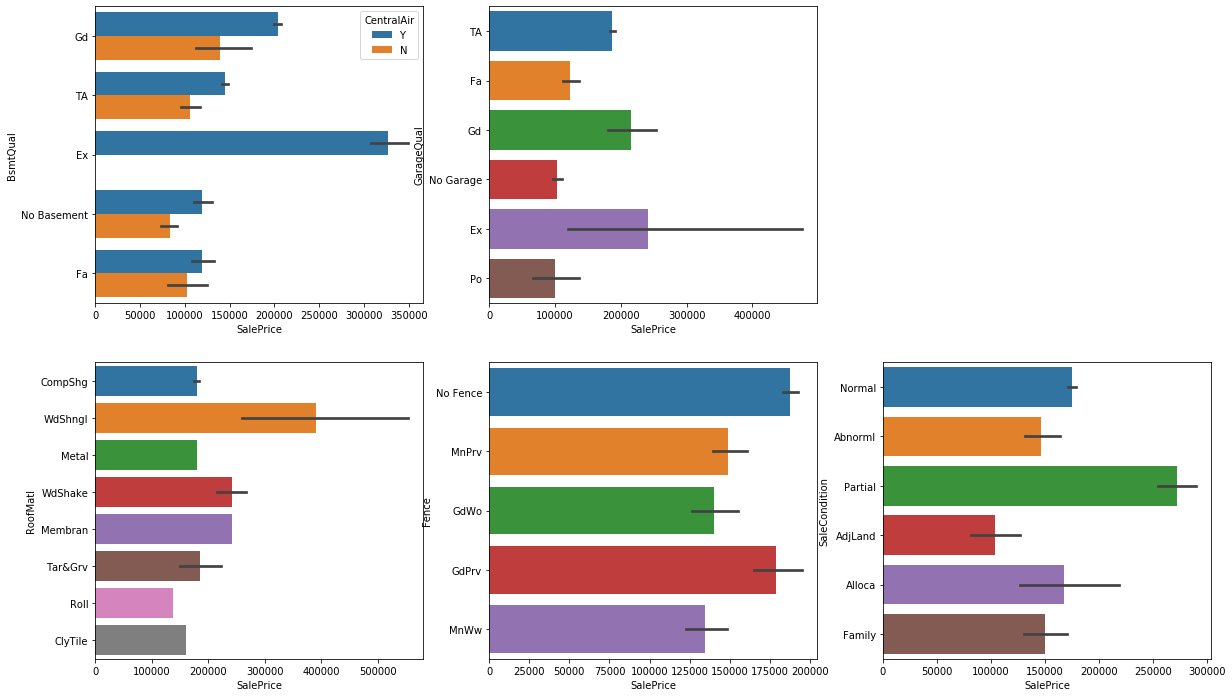

In [682]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.barplot(x="SalePrice",y="BsmtQual",data=house_price,hue="CentralAir")

plt.subplot(2,3,2)
sns.barplot(x="SalePrice",y="GarageQual",data=house_price)

#From the below graphs, we can see that the house with Air Conditioning have a higher sake price

plt.subplot(2,3,4)
sns.barplot(x="SalePrice",y="RoofMatl",data=house_price)

#Homes with Good Private Fence and which do not have fence are sold for higher price
plt.subplot(2,3,5)
sns.barplot(x="SalePrice",y="Fence",data=house_price)

#Partial Sale Condition have higher Sale Price
plt.subplot(2,3,6)
sns.barplot(x="SalePrice",y="SaleCondition",data=house_price)



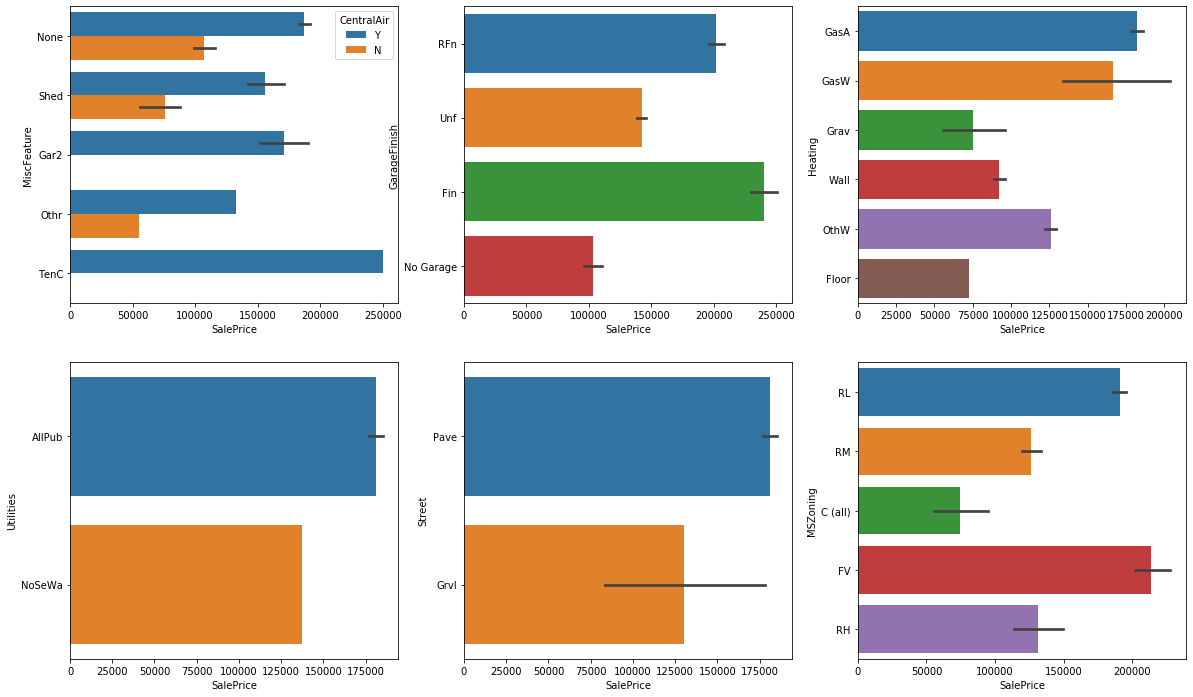

In [683]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.barplot(x="SalePrice",y="MiscFeature",data=house_price,hue="CentralAir")

plt.subplot(2,3,2)
sns.barplot(x="SalePrice",y="GarageFinish",data=house_price)

plt.subplot(2,3,3)
sns.barplot(x="SalePrice",y="Heating",data=house_price)

plt.subplot(2,3,4)
sns.barplot(x="SalePrice",y="Utilities",data=house_price)

plt.subplot(2,3,5)
sns.barplot(x="SalePrice",y="Street",data=house_price)

plt.subplot(2,3,6)
sns.barplot(x="SalePrice",y="MSZoning",data=house_price)

## Bivariate Analysis

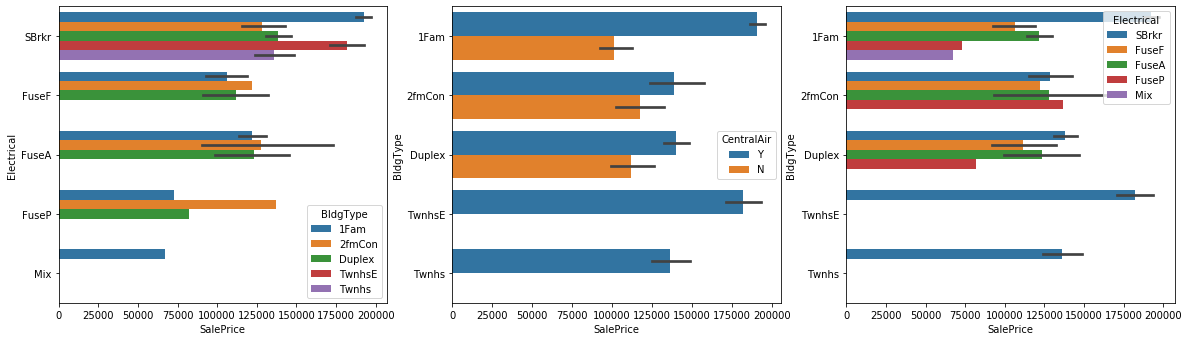

In [684]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.barplot(x="SalePrice",y="Electrical",data=house_price,hue="BldgType")

plt.subplot(2,3,2)
sns.barplot(x="SalePrice",y="BldgType",data=house_price,hue="CentralAir")

plt.subplot(2,3,3)
sns.barplot(x="SalePrice",y="BldgType",data=house_price,hue="Electrical")


In [685]:
house_price_numeric = house_price.select_dtypes(include=['float64', 'int64'])
house_price_numeric.head()


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0   1          60         65.0     8450            7            5       196.0   
1   2          20         80.0     9600            6            8         0.0   
2   3          60         68.0    11250            7            5       162.0   
3   4          70         60.0     9550            7            5         0.0   
4   5          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  ScreenPorch  PoolArea  MiscVal  \
0         706           0        150  ...            0         0        0   
1         978           0        284  ...            0         0        0   
2         486           0        434  ...            0         0        0   
3         216           0        540  ...            0         0        0   
4         655           0        490  ...            0         0        0   

   MoSold  SalePrice  SalePriceTransformed  Age_of_Garage  Age_Of_Home  \
0       2     208500             12.247694           17.0           17   
1       5     181500             12.109011           44.0           44   
2       9     223500             12.317167           19.0           19   
3       2     140000             11.849398           22.0          105   
4      12     250000             12.429216           20.0           20   

   Age_Of_Remod  Age_Since_Sold  
0            17              12  
1            44              13  
2            18              12  
3            50              14  
4            20              12  

[5 rows x 39 columns]

In [686]:
house_price_numeric.drop(['Id'],axis=1,inplace=True)

<Figure size 1080x1080 with 0 Axes>

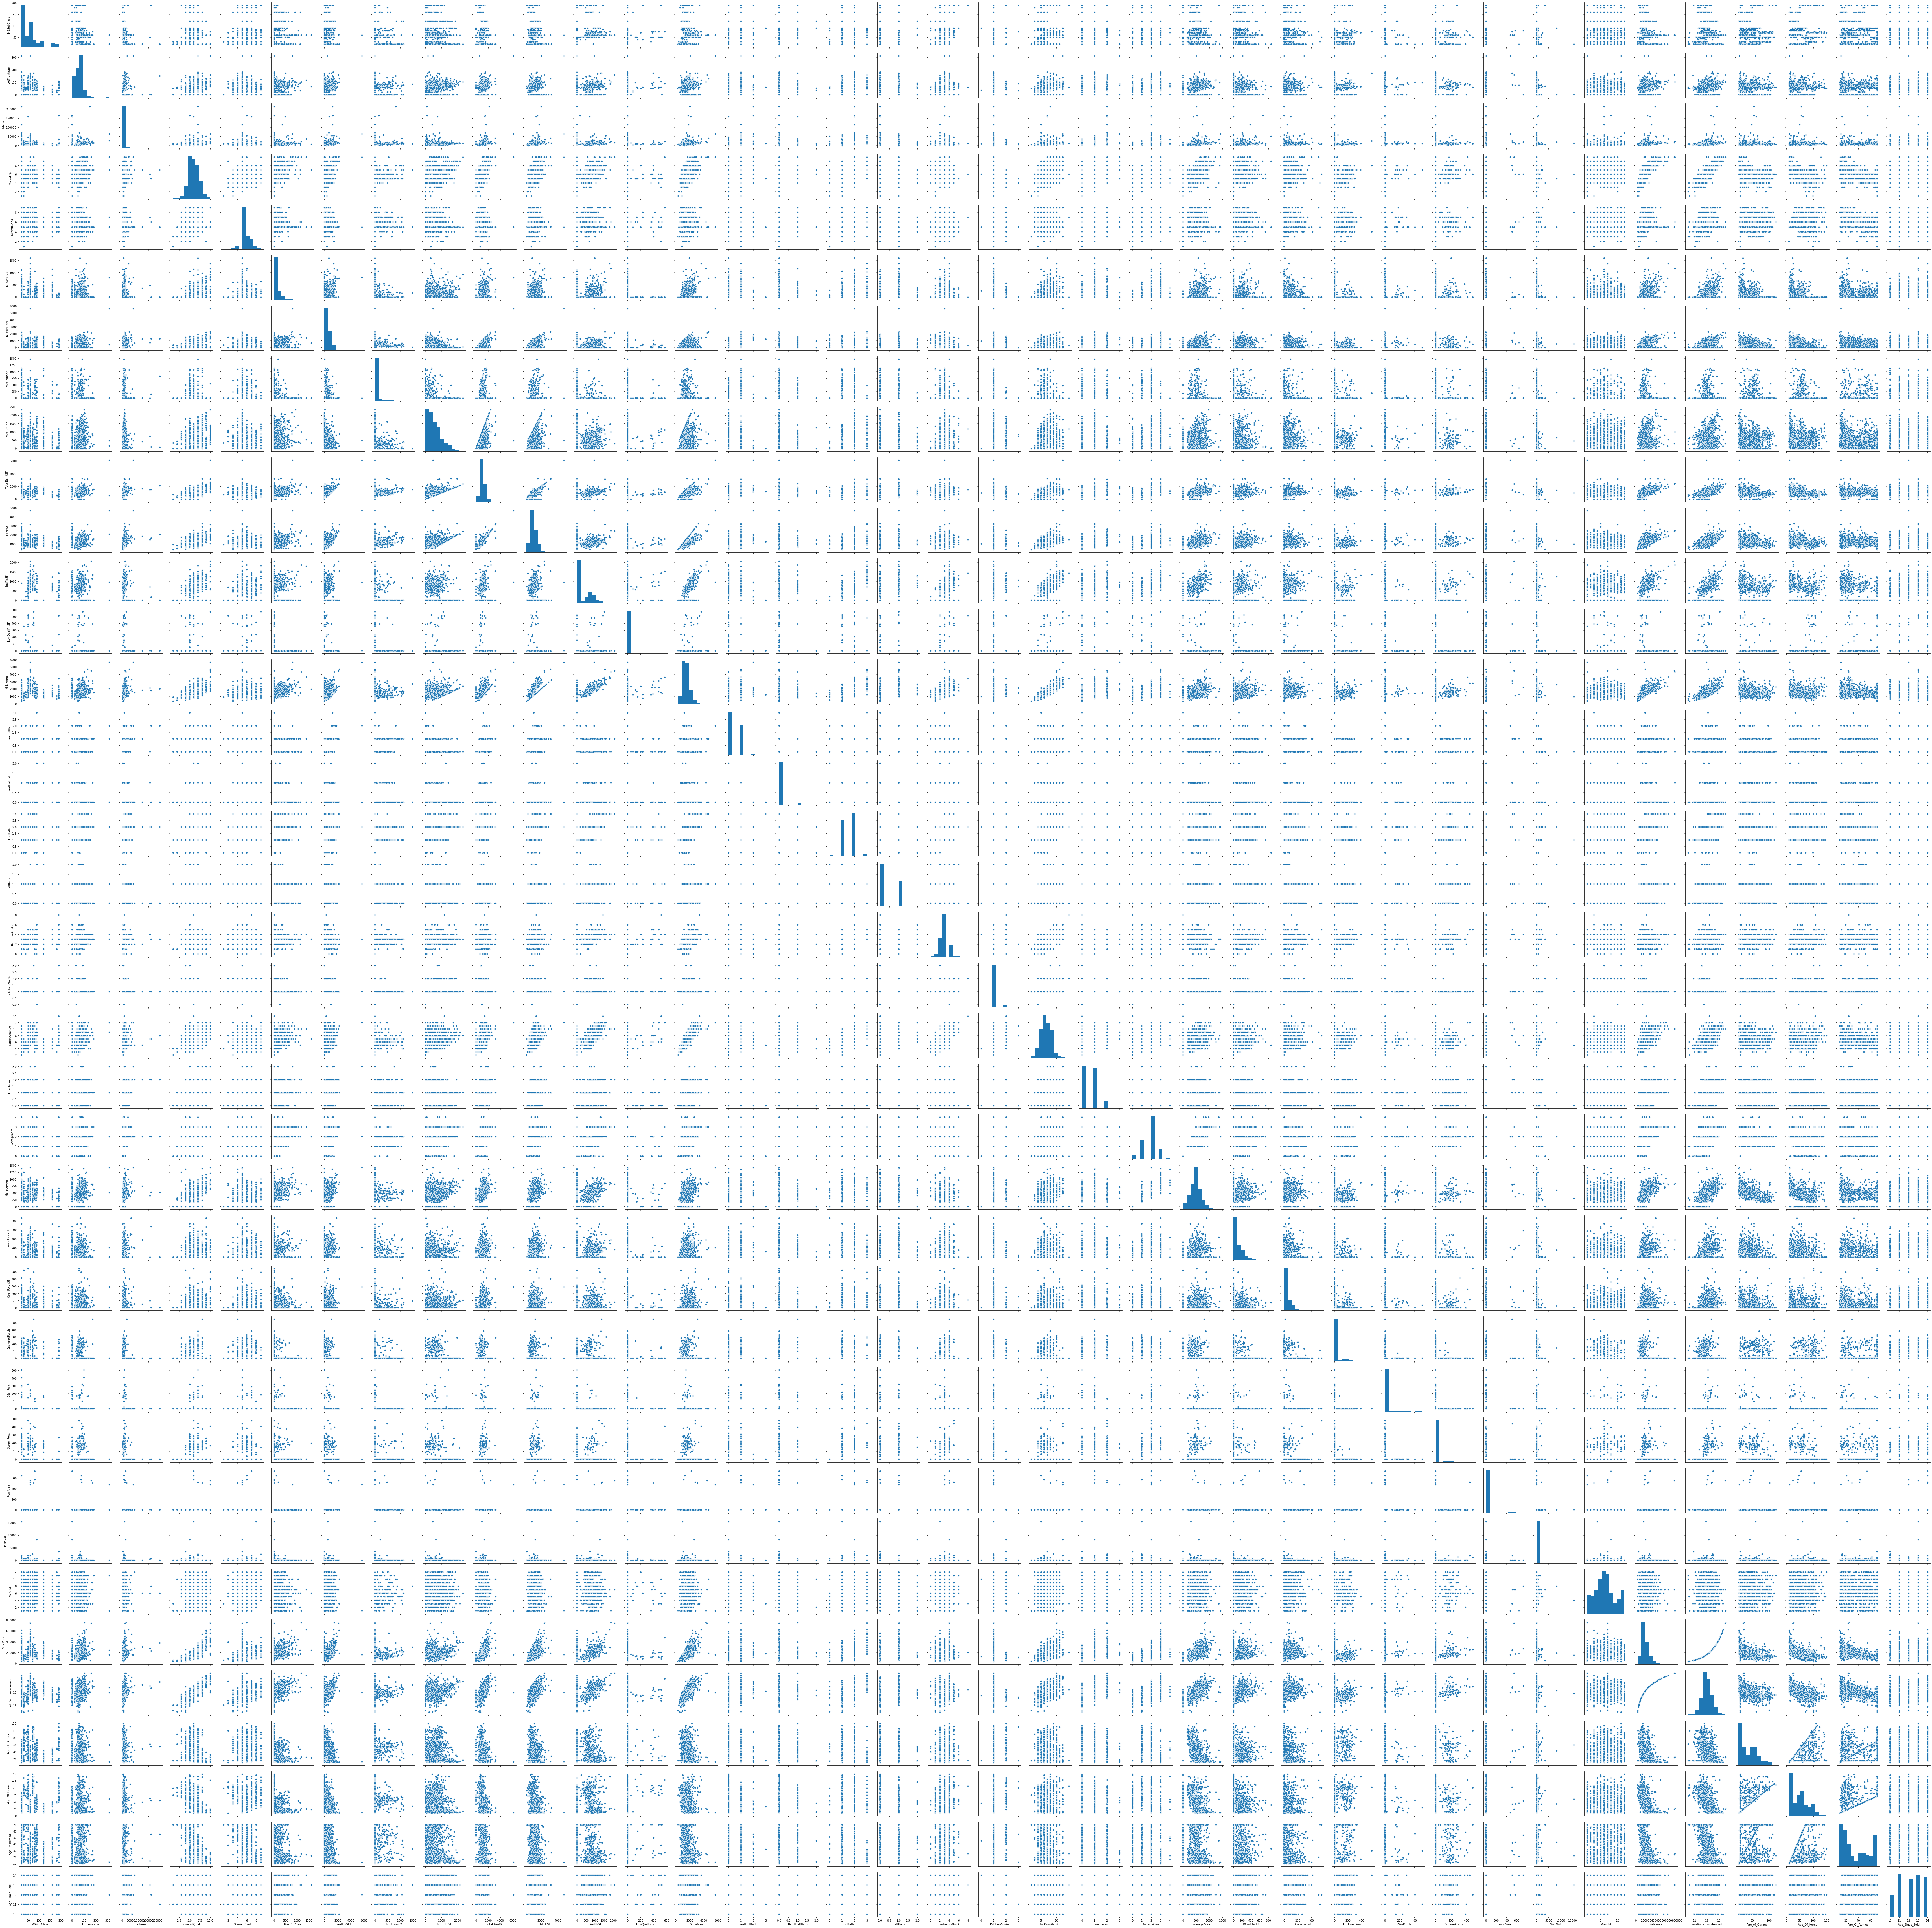

In [751]:
plt.figure(figsize=(15,15))
sns.pairplot(house_price_numeric)
plt.show()

In [687]:
# Encoding columns which have only two values
le = LabelEncoder()
house_price['Street']=le.fit_transform(house_price['Street'])
house_price['Utilities']=le.fit_transform(house_price['Utilities'])
house_price['CentralAir']=le.fit_transform(house_price['CentralAir'])

In [688]:
house_price_categorical = house_price.select_dtypes(include=['object'])

In [689]:
house_price_categorical.head()

MSZoning     Alley LotShape LandContour LotConfig LandSlope Neighborhood  \
0       RL  No Alley      Reg         Lvl    Inside       Gtl      CollgCr   
1       RL  No Alley      Reg         Lvl       FR2       Gtl      Veenker   
2       RL  No Alley      IR1         Lvl    Inside       Gtl      CollgCr   
3       RL  No Alley      IR1         Lvl    Corner       Gtl      Crawfor   
4       RL  No Alley      IR1         Lvl       FR2       Gtl      NoRidge   

  Condition1 Condition2 BldgType  ... GarageType GarageFinish GarageQual  \
0       Norm       Norm     1Fam  ...     Attchd          RFn         TA   
1      Feedr       Norm     1Fam  ...     Attchd          RFn         TA   
2       Norm       Norm     1Fam  ...     Attchd          RFn         TA   
3       Norm       Norm     1Fam  ...     Detchd          Unf         TA   
4       Norm       Norm     1Fam  ...     Attchd          RFn         TA   

  GarageCond PavedDrive   PoolQC     Fence MiscFeature SaleType SaleCondition  
0         TA          Y  No Pool  No Fence        None       WD        Normal  
1         TA          Y  No Pool  No Fence        None       WD        Normal  
2         TA          Y  No Pool  No Fence        None       WD        Normal  
3         TA          Y  No Pool  No Fence        None       WD       Abnorml  
4         TA          Y  No Pool  No Fence        None       WD        Normal  

[5 rows x 40 columns]

In [690]:
house_price_categorical.shape

(1460, 40)

In [691]:
house_price_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  ScreenPorch  PoolArea  \
0         706           0        150          856  ...            0         0   
1         978           0        284         1262  ...            0         0   
2         486           0        434          920  ...            0         0   
3         216           0        540          756  ...            0         0   
4         655           0        490         1145  ...            0         0   

   MiscVal  MoSold  SalePrice  SalePriceTransformed  Age_of_Garage  \
0        0       2     208500             12.247694           17.0   
1        0       5     181500             12.109011           44.0   
2        0       9     223500             12.317167           19.0   
3        0       2     140000             11.849398           22.0   
4        0      12     250000             12.429216           20.0   

   Age_Of_Home  Age_Of_Remod  Age_Since_Sold  
0           17            17              12  
1           44            44              13  
2           19            18              12  
3          105            50              14  
4           20            20              12  

[5 rows x 38 columns]

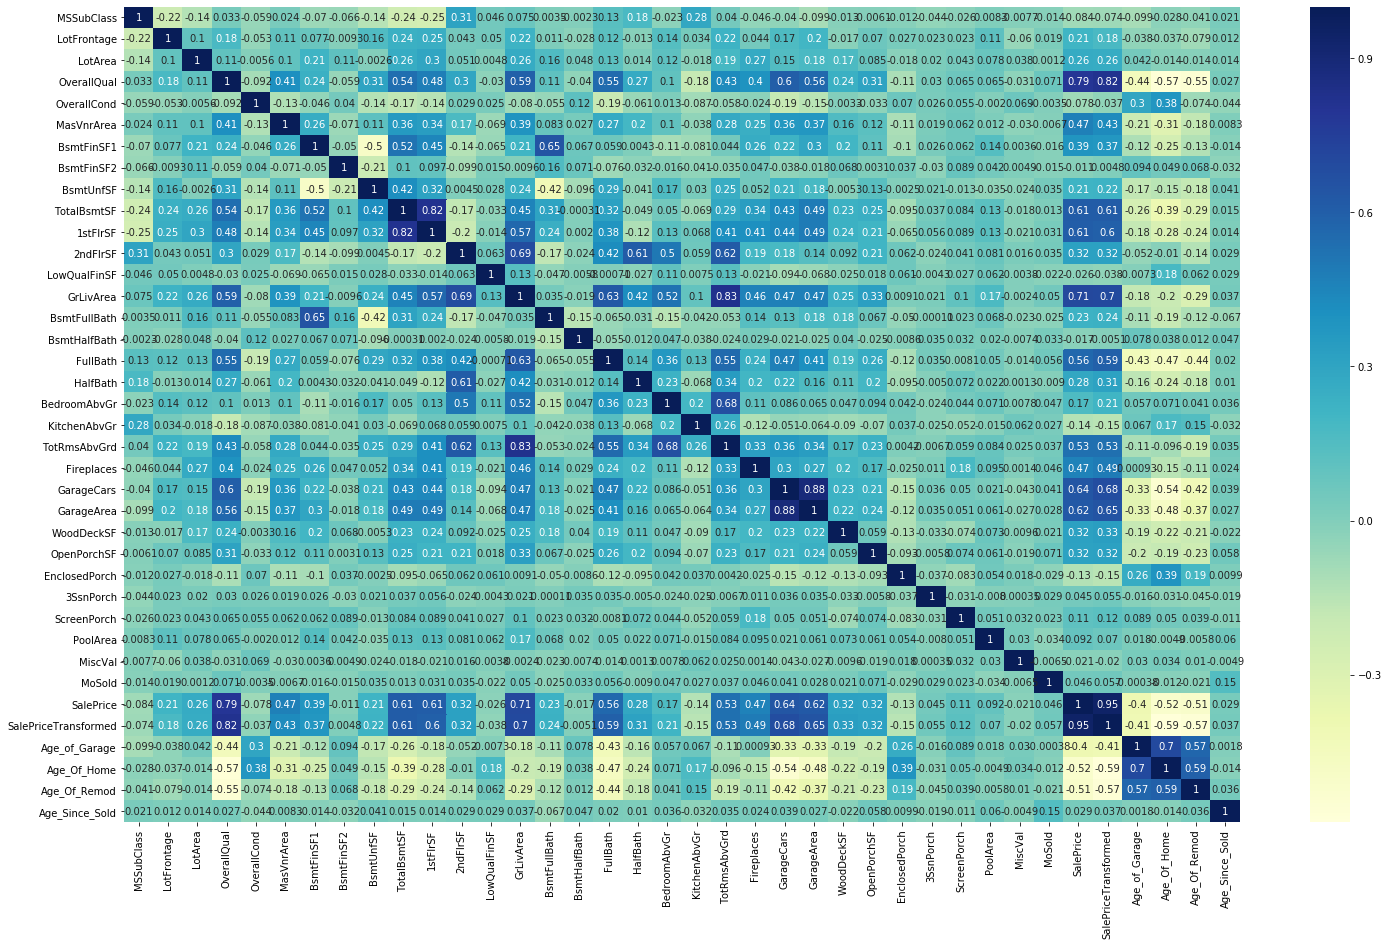

In [692]:
cor = house_price_numeric.corr()
cor
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(25,15))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [693]:
house_price_dummies=pd.get_dummies(house_price_categorical, drop_first=True)


In [694]:
house_price_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_No Alley  \
0            0            0            1            0               1   
1            0            0            1            0               1   
2            0            0            1            0               1   
3            0            0            1            0               1   
4            0            0            1            0               1   

   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  ...  \
0           0             0             0             1                0  ...   
1           0             0             0             1                0  ...   
2           0             0             0             0                0  ...   
3           0             0             0             0                0  ...   
4           0             0             0             0                0  ...   

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0               0             0             0            1   
1               0               0             0             0            1   
2               0               0             0             0            1   
3               0               0             0             0            1   
4               0               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 220 columns]

In [695]:
# drop categorical variables 
house_price = house_price.drop(list(house_price_categorical.columns), axis=1)

In [696]:
house_price=pd.concat([house_price,house_price_dummies],axis=1)

In [697]:
house_price.shape

(1460, 262)

In [698]:
y = house_price.loc[:, 'SalePriceTransformed']
X = house_price.loc[:, house_price.columns != 'SalePriceTransformed']
X.drop(['Id'],axis=1,inplace=True)

In [699]:
X.describe()

MSSubClass  LotFrontage        LotArea       Street    Utilities  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    57.623288   10516.828082     0.995890     0.000685   
std      42.300571    34.664304    9981.264932     0.063996     0.026171   
min      20.000000     0.000000    1300.000000     0.000000     0.000000   
25%      20.000000    42.000000    7553.500000     1.000000     0.000000   
50%      50.000000    63.000000    9478.500000     1.000000     0.000000   
75%      70.000000    79.000000   11601.500000     1.000000     0.000000   
max     190.000000   313.000000  215245.000000     1.000000     1.000000   

       OverallQual  OverallCond   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean      6.099315     5.575342   103.117123   443.639726    46.549315  ...   
std       1.382997     1.112799   180.731373   456.098091   161.319273  ...   
min       1.000000     1.000000     0.000000     0.000000     0.000000  ...   
25%       5.000000     5.000000     0.000000     0.000000     0.000000  ...   
50%       6.000000     5.000000     0.000000   383.500000     0.000000  ...   
75%       7.000000     6.000000   164.250000   712.250000     0.000000  ...   
max      10.000000     9.000000  1600.000000  5644.000000  1474.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count     1460.000000     1460.000000   1460.000000   1460.000000   
mean         0.003425        0.003425      0.083562      0.002055   
std          0.058440        0.058440      0.276824      0.045299   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count  1460.000000            1460.000000           1460.000000   
mean      0.867808               0.002740              0.008219   
std       0.338815               0.052289              0.090317   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1460.000000           1460.000000            1460.000000  
mean               0.013699              0.820548               0.085616  
std                0.116277              0.383862               0.279893  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 260 columns]

In [700]:
scaler = StandardScaler()
scaler.fit_transform(X)


array([[ 0.07337496,  0.2128772 , -0.20714171, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276,  0.64574726, -0.09188637, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.07337496,  0.29945121,  0.07347998, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [ 0.30985939,  0.2417352 , -0.14781027, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276,  0.29945121, -0.08016039, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276,  0.50145724, -0.05811155, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [701]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=1)

In [702]:
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9796707052307622

In [703]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.9366413408585157

In [704]:
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.889),
 ('MSSubClass', 0.025),
 ('LotFrontage', 0.022),
 ('LotArea', 0.022),
 ('Street', 0.021),
 ('Utilities', 0.019),
 ('OverallQual', 0.019),
 ('OverallCond', 0.015),
 ('MasVnrArea', 0.014),
 ('BsmtFinSF1', 0.012),
 ('BsmtFinSF2', 0.011),
 ('BsmtUnfSF', 0.008),
 ('TotalBsmtSF', 0.007),
 ('CentralAir', 0.006),
 ('1stFlrSF', 0.005),
 ('2ndFlrSF', 0.005),
 ('LowQualFinSF', 0.003),
 ('GrLivArea', 0.003),
 ('BsmtFullBath', 0.003),
 ('BsmtHalfBath', 0.003),
 ('FullBath', 0.003),
 ('HalfBath', 0.002),
 ('BedroomAbvGr', 0.001),
 ('KitchenAbvGr', 0.001),
 ('TotRmsAbvGrd', 0.001),
 ('Fireplaces', 0.001),
 ('GarageCars', 0.001),
 ('GarageArea', 0.001),
 ('WoodDeckSF', 0.001),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', 0.0),
 ('SalePrice', 0.0),
 ('Age_of_Garage', 0.0),
 ('Age_Of_Home', 0.0),
 ('Age_Of_Remod', 0.0),
 ('Age_Since_Sold', 0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH',

## 3. Model Building and Evaluation

## Ridge and Lasso Regression

## Ridge Regression

In [705]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()


# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [706]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=300]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.011549      0.001481         0.001197        0.000399      0.0001   
1       0.012766      0.002308         0.002406        0.000479       0.001   
2       0.011370      0.001620         0.002020        0.000031        0.01   
3       0.009198      0.000390         0.001781        0.000373        0.05   
4       0.009774      0.000746         0.001797        0.000398         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.928650           0.960279           0.912158   
1   {'alpha': 0.001}           0.928837           0.960609           0.912398   
2    {'alpha': 0.01}           0.930467           0.961793           0.914467   
3    {'alpha': 0.05}           0.935399           0.963318           0.920544   
4     {'alpha': 0.1}           0.939417           0.964478           0.925357   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.941385  ...         0.937897        0.016396               28   
1           0.941685  ...         0.938140        0.016420               27   
2           0.943503  ...         0.939735        0.016130               26   
3           0.945950  ...         0.943351        0.014532               24   
4           0.947049  ...         0.945974        0.013184               23   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.982312            0.980211            0.984187   
1            0.982312            0.980209            0.984187   
2            0.982308            0.980177            0.984178   
3            0.982252            0.980076            0.984078   
4            0.982156            0.979988            0.983934   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.981554            0.982297          0.982112         0.001289  
1            0.981553            0.982296          0.982112         0.001289  
2            0.981530            0.982267          0.982092         0.001297  
3            0.981438            0.982123          0.981993         0.001297  
4            0.981365            0.981981          0.981885         0.001277  

[5 rows x 21 columns]

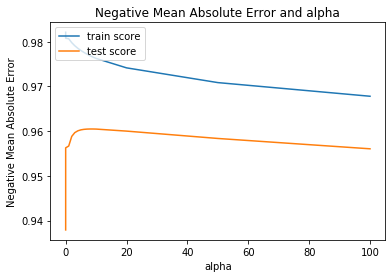

In [707]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [708]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 8.0}
0.9604695261424471


In [709]:
alpha = 8.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9758173379103978
0.937821235158951


In [710]:
ridge.coef_

array([ 1.09989329e-04, -6.93239304e-05,  2.01458311e-07, -8.33060155e-03,
       -5.80380789e-03,  2.24620694e-02,  1.63133776e-02, -8.73433594e-05,
       -2.13957361e-05,  2.19017811e-05, -9.85103348e-06, -9.34499109e-06,
        3.86084113e-02,  2.77473438e-05, -1.97133808e-05,  4.54705707e-05,
        5.35045323e-05,  2.37616701e-02,  1.41153310e-03,  9.15715171e-03,
        1.19161989e-03,  2.24813162e-02, -6.64020028e-03,  5.30881632e-04,
       -4.73732472e-03,  1.11879136e-02,  2.64599051e-05,  4.65566883e-05,
        1.22669345e-04,  1.78755140e-04,  5.76766565e-05,  1.04104824e-04,
       -6.93230238e-06,  2.43442721e-06,  2.13988299e-03,  3.46627067e-06,
        4.29678458e-05, -6.68448672e-04, -5.18569845e-04,  1.90085294e-03,
        5.96809655e-03,  1.76139262e-02,  1.48847510e-02, -2.36777929e-02,
       -2.08494033e-02,  1.70810262e-02,  3.56422970e-03, -1.15271527e-03,
       -3.99154844e-03,  3.61724232e-03,  1.39992952e-02,  1.37795310e-02,
        9.93471086e-03,  

## Lasso

In [711]:
lm = Lasso(alpha=8.0)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.910371314130537
0.8787619599622962


In [712]:

folds=5
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}
# cross validation
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [713]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=300]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.040293      0.011979         0.001795        0.000398       0.001   
1       0.016188      0.003098         0.001962        0.000585        0.01   
2       0.015339      0.002775         0.002638        0.000494           1   
3       0.014570      0.001842         0.002826        0.000715           5   
4       0.016755      0.002705         0.002910        0.000653          10   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.957864           0.966193           0.929863   
1   {'alpha': 0.01}           0.932383           0.948414           0.896570   
2    {'alpha': 1.0}           0.937978           0.928374           0.859852   
3    {'alpha': 5.0}           0.942526           0.921257           0.850694   
4   {'alpha': 10.0}           0.941064           0.920271           0.849368   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.958058  ...         0.955562        0.013337                1   
1           0.940116  ...         0.932774        0.018937                2   
2           0.919141  ...         0.913908        0.027715                3   
3           0.916928  ...         0.909163        0.030870                4   
4           0.916026  ...         0.907899        0.030880                5   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.967799            0.966866            0.970536   
1            0.945687            0.943749            0.951922   
2            0.916105            0.918983            0.933150   
3            0.905731            0.909456            0.927027   
4            0.902518            0.907724            0.926100   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.968627            0.966305          0.968027         0.001485  
1            0.946183            0.944126          0.946333         0.002940  
2            0.921451            0.919490          0.921836         0.005910  
3            0.911509            0.910740          0.912892         0.007341  
4            0.909068            0.909427          0.910967         0.007961  

[5 rows x 21 columns]

In [714]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.040293      0.011979         0.001795        0.000398       0.001   
1       0.016188      0.003098         0.001962        0.000585        0.01   
2       0.015339      0.002775         0.002638        0.000494           1   
3       0.014570      0.001842         0.002826        0.000715           5   
4       0.016755      0.002705         0.002910        0.000653          10   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.957864           0.966193           0.929863   
1   {'alpha': 0.01}           0.932383           0.948414           0.896570   
2    {'alpha': 1.0}           0.937978           0.928374           0.859852   
3    {'alpha': 5.0}           0.942526           0.921257           0.850694   
4   {'alpha': 10.0}           0.941064           0.920271           0.849368   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.958058  ...         0.955562        0.013337                1   
1           0.940116  ...         0.932774        0.018937                2   
2           0.919141  ...         0.913908        0.027715                3   
3           0.916928  ...         0.909163        0.030870                4   
4           0.916026  ...         0.907899        0.030880                5   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.967799            0.966866            0.970536   
1            0.945687            0.943749            0.951922   
2            0.916105            0.918983            0.933150   
3            0.905731            0.909456            0.927027   
4            0.902518            0.907724            0.926100   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.968627            0.966305          0.968027         0.001485  
1            0.946183            0.944126          0.946333         0.002940  
2            0.921451            0.919490          0.921836         0.005910  
3            0.911509            0.910740          0.912892         0.007341  
4            0.909068            0.909427          0.910967         0.007961  

[5 rows x 21 columns]

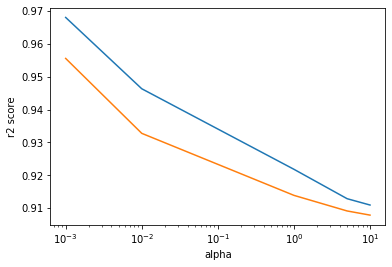

In [715]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [716]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=8.0)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.910371314130537
0.8787619599622962


In [717]:
lm.coef_

array([-0.00000000e+00, -0.00000000e+00,  2.42253211e-07,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  4.72067828e-06,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [718]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=5)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9118805962039189
0.8791598033033691


In [719]:
lm.coef_

array([-0.00000000e+00, -0.00000000e+00,  1.81142132e-07,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.96835157e-06,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.62772832e-05,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  4.63987708e-06,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [720]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.1)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9374594916665963
0.9081701052146633


In [721]:
lm.coef_

array([-8.44817789e-05, -1.98170087e-04,  4.47738544e-07,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.28249881e-04,
       -0.00000000e+00,  8.00549386e-06,  0.00000000e+00,  2.78202412e-05,
        0.00000000e+00,  4.81821151e-06,  1.89161578e-05, -0.00000000e+00,
        5.94505089e-05,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.15068616e-04,  5.14867055e-05,
        3.51415225e-05,  1.09453803e-04,  4.38207733e-05,  1.36174602e-04,
       -1.95270944e-05, -1.64393812e-06,  0.00000000e+00,  3.84788258e-06,
        5.50537323e-04, -1.56248306e-03, -1.02112450e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [722]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9449261020386981
0.91838632113131


In [723]:
lm.coef_

array([-1.41932969e-04, -2.72419066e-04,  6.05045406e-07,  0.00000000e+00,
        0.00000000e+00,  1.12351959e-02,  1.40220382e-02, -1.30000496e-04,
        1.24546247e-05,  1.94173740e-05,  1.03943270e-05,  1.06648834e-05,
        0.00000000e+00,  6.58894881e-05,  7.13347322e-05,  9.61648347e-05,
        1.10829444e-05,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.01122569e-03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.09015099e-04,  6.21786024e-05,
        5.24300548e-05,  1.96763729e-04,  1.13162589e-04,  1.64583691e-04,
       -1.28566473e-04, -3.68144539e-06,  2.79114795e-03,  3.61143449e-06,
        1.03011840e-03, -2.31452392e-03, -9.74478184e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [724]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.002)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9608380457364839
0.9327443279808739


In [725]:
lm.coef_

array([ 1.49948529e-06, -2.34245520e-04,  3.53893487e-07,  0.00000000e+00,
        0.00000000e+00,  2.17764026e-02,  1.89092615e-02, -1.14978201e-04,
        4.57873092e-06,  3.73622980e-05,  5.70172169e-06,  5.13032293e-06,
        1.94755252e-02,  4.28920195e-05,  3.32768402e-05,  7.50831717e-05,
        4.54682043e-06,  1.06531835e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.24525801e-02, -0.00000000e+00,  7.61003106e-04,
        1.17956963e-03,  6.19096225e-03,  9.27441736e-05,  3.85356971e-05,
        9.18209312e-05,  1.91404608e-04,  1.03418149e-04,  1.12200581e-04,
       -9.56588346e-05, -3.04280719e-06,  2.80627161e-03,  3.49810807e-06,
        7.50701147e-04, -1.39990072e-03, -8.06380458e-04,  2.80196492e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.08389981e-02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [726]:
# lasso model parameters
model_parameters = list(lm.coef_)

model_parameters.sort(reverse=True)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.889),
 ('MSSubClass', 0.026),
 ('LotFrontage', 0.023),
 ('LotArea', 0.022),
 ('Street', 0.022),
 ('Utilities', 0.019),
 ('OverallQual', 0.019),
 ('OverallCond', 0.016),
 ('MasVnrArea', 0.015),
 ('BsmtFinSF1', 0.015),
 ('BsmtFinSF2', 0.011),
 ('BsmtUnfSF', 0.009),
 ('TotalBsmtSF', 0.007),
 ('CentralAir', 0.007),
 ('1stFlrSF', 0.006),
 ('2ndFlrSF', 0.006),
 ('LowQualFinSF', 0.005),
 ('GrLivArea', 0.003),
 ('BsmtFullBath', 0.003),
 ('BsmtHalfBath', 0.001),
 ('FullBath', 0.001),
 ('HalfBath', 0.001),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 0.0),
 ('GarageCars', 0.0),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', 0.0),
 ('SalePrice', 0.0),
 ('Age_of_Garage', 0.0),
 ('Age_Of_Home', 0.0),
 ('Age_Of_Remod', 0.0),
 ('Age_Since_Sold', 0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZo

### Optimal Value of Lambda : 0.001


### From the above we can see that the top 5 predictor variables are

1. MSSubClass
2. LotFrontage
3. LotArea
4. Street
5. Utilities

In [727]:
y = house_price.loc[:, 'SalePriceTransformed']
X = house_price.loc[:, house_price.columns != 'SalePriceTransformed']
X.drop(['Id','MSSubClass','LotFrontage','LotArea','Street','Utilities'],axis=1,inplace=True)

In [728]:
scaler = StandardScaler()
scaler.fit_transform(X)


array([[ 0.65147924, -0.51719981,  0.51410389, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.07183611,  2.17962776, -0.57075013, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.65147924, -0.51719981,  0.32591493, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [ 0.65147924,  3.07857028, -0.57075013, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.79515147,  0.38174271, -0.57075013, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.79515147,  0.38174271, -0.57075013, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [729]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=1)

In [730]:
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9795853360778732

In [731]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.9367957047048672

In [732]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()


# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [733]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=300]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.014329      0.003466         0.002226        0.000385      0.0001   
1       0.010572      0.001017         0.001795        0.000747       0.001   
2       0.012503      0.001768         0.002163        0.000416        0.01   
3       0.013774      0.002319         0.002383        0.000498        0.05   
4       0.013726      0.002001         0.002599        0.000521         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.936515           0.962118           0.913971   
1   {'alpha': 0.001}           0.936621           0.962528           0.914193   
2    {'alpha': 0.01}           0.937561           0.963888           0.916148   
3    {'alpha': 0.05}           0.940588           0.965108           0.922112   
4     {'alpha': 0.1}           0.943244           0.965953           0.926861   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.941766  ...         0.940622        0.015846               28   
1           0.942088  ...         0.940862        0.015897               27   
2           0.944050  ...         0.942334        0.015712               25   
3           0.946611  ...         0.945448        0.014212               24   
4           0.947661  ...         0.947682        0.012929               22   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.982067            0.980063            0.983880   
1            0.982067            0.980061            0.983880   
2            0.982064            0.980027            0.983872   
3            0.982019            0.979923            0.983785   
4            0.981942            0.979837            0.983659   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.981464            0.982091          0.981913         0.001229  
1            0.981463            0.982091          0.981912         0.001229  
2            0.981440            0.982065          0.981893         0.001238  
3            0.981349            0.981938          0.981803         0.001244  
4            0.981279            0.981810          0.981705         0.001229  

[5 rows x 21 columns]

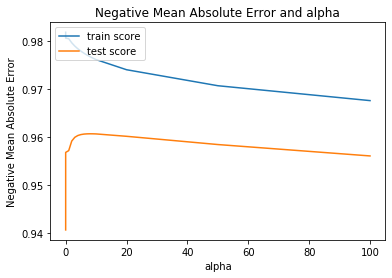

In [734]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [735]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 8.0}
0.960701378056423


In [736]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9733827878749731
0.9380138816371838


In [737]:
lm = Lasso(alpha=20)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9103049624429116
0.8787049412539037


In [738]:

folds=5
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}
# cross validation
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

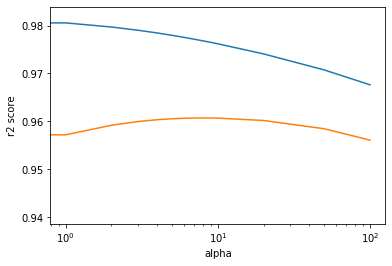

In [739]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [740]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=20.0)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9103049624429116
0.8787049412539037


In [741]:
lm.coef_

array([ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  4.72769689e-06, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [742]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=10.0)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9103053077012419
0.8787185009105813


In [743]:
lm.coef_

array([ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  4.72937908e-06, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [744]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=1.0)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9208374494252846
0.886671303262819


In [745]:
lm.coef_

array([ 0.00000000e+00,  0.00000000e+00, -7.63105358e-05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.61816326e-05,  0.00000000e+00,
        0.00000000e+00,  2.09954837e-05, -0.00000000e+00,  2.34503037e-05,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.34990283e-04,  4.11350892e-06,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  4.31319710e-06, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [746]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.943836006568632
0.9181521406873455


In [747]:
lm.coef_

array([ 8.97733020e-03,  1.49456144e-02, -1.30886322e-04,  1.24077954e-05,
        2.41399104e-05,  9.91141033e-06,  1.02759580e-05,  0.00000000e+00,
        6.71743449e-05,  6.79207538e-05,  9.02438846e-05,  1.04159103e-05,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.21137542e-03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.07823888e-04,  6.95260923e-05,  6.50871978e-05,
        1.92557647e-04,  1.22716375e-04,  1.56441893e-04, -1.45114994e-04,
       -2.22836782e-06,  2.77977831e-03,  3.65641774e-06,  1.07938657e-03,
       -2.34145984e-03, -9.36672403e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [748]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9669441512138218
0.9362884218143572


In [749]:
lm.coef_

array([ 2.05534222e-02,  1.89814096e-02, -1.08050355e-04, -1.44680058e-05,
        3.32559192e-05, -4.62964410e-06, -1.94875026e-06,  3.66840533e-02,
        5.57960147e-05,  2.70347932e-05,  5.83915062e-05,  5.65191044e-06,
        1.88250760e-02,  0.00000000e+00,  5.30225749e-03,  0.00000000e+00,
        2.18295414e-02,  0.00000000e+00,  2.13443534e-03,  5.09360555e-04,
        1.17898582e-02,  6.20752542e-05,  4.21278061e-05,  1.22127405e-04,
        1.76244561e-04,  8.36294214e-05,  1.00944255e-04, -4.55000635e-05,
       -1.34423385e-07,  2.35577848e-03,  3.47057884e-06,  4.79706028e-04,
       -1.09915054e-03, -6.46657021e-04,  2.88891538e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -4.19771531e-02, -3.51652187e-03,
        1.16396667e-02,  0.00000000e+00, -0.00000000e+00, -2.15365377e-03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.29084574e-03,
        0.00000000e+00,  0.00000000e+00, -3.74327721e-04, -0.00000000e+00,
        0.00000000e+00, -

In [750]:
# lasso model parameters
model_parameters = list(lm.coef_)

model_parameters.sort(reverse=True)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.802),
 ('OverallQual', 0.037),
 ('OverallCond', 0.03),
 ('MasVnrArea', 0.028),
 ('BsmtFinSF1', 0.024),
 ('BsmtFinSF2', 0.024),
 ('BsmtUnfSF', 0.023),
 ('TotalBsmtSF', 0.023),
 ('CentralAir', 0.022),
 ('1stFlrSF', 0.021),
 ('2ndFlrSF', 0.02),
 ('LowQualFinSF', 0.019),
 ('GrLivArea', 0.019),
 ('BsmtFullBath', 0.018),
 ('BsmtHalfBath', 0.017),
 ('FullBath', 0.013),
 ('HalfBath', 0.012),
 ('BedroomAbvGr', 0.012),
 ('KitchenAbvGr', 0.009),
 ('TotRmsAbvGrd', 0.009),
 ('Fireplaces', 0.008),
 ('GarageCars', 0.007),
 ('GarageArea', 0.007),
 ('WoodDeckSF', 0.005),
 ('OpenPorchSF', 0.005),
 ('EnclosedPorch', 0.005),
 ('3SsnPorch', 0.004),
 ('ScreenPorch', 0.003),
 ('PoolArea', 0.003),
 ('MiscVal', 0.003),
 ('MoSold', 0.002),
 ('SalePrice', 0.002),
 ('Age_of_Garage', 0.002),
 ('Age_Of_Home', 0.002),
 ('Age_Of_Remod', 0.001),
 ('Age_Since_Sold', 0.001),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', 0.0),
 ('Alley_No Alley', 0.0),
 ('Alley_Pav

### Optimal Value of Lambda : 0.001 after removing the top predictor variables


### From the above we can see that the top 5 predictor variables are

1. OverallQual
2. OverallCond
3. MasVnrArea
4. BsmtFinSF1
5. BsmtFinSF2